In [1]:
import gym
import random
import math
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from collections import deque
import matplotlib.pyplot as plt

In [8]:
# Hyperparameter
EPISODES    = 500        # 에피소드 반복 횟수
EPS_START  = 0.9       # 학습 시작 시 에이전트가 무작위로 행동할 확률
EPS_END     = 0.05     # 학습 막바지에 에이전트가 무작위로 행동할 확률
EPS_DECAY  = 200     # 학습 진행 시 에이전트가 무작위로 행동할 확률을 감소시키는 값
GAMMA        = 0.8      # Discount factor
LR                = 0.001 # Learning rate
BATCH_SIZE  = 64     # Batch 크기

In [6]:
class DQNAgent:
    def __init__(self):
        self.model = nn.Sequential(
            nn.Linear(4, 256),
            nn.ReLU(),
            nn.Linear(256, 2)
        )
        
        self.optimizer = optim.Adam(self.model.parameters(), lr=LR)
        self.steps_done = 0    # 학습을 반복할 때마다 증가하는 변수
        
        self.memory = deque(maxlen=10000)    # Experience Replay
        
    def memorize(self, state, action, reward, next_state):
        self.memory.append(
            (state,
             action,
             torch.FloatTensor([reward]),
             torch.FloatTensor([next_state]))
        )
    
    def act(self, state):
        eps_threshold = EPS_END + (EPS_START - EPS_END) *math.exp(-1. * self.steps_done / EPS_DECAY)
        self.steps_done += 1
        if random.random() > eps_threshold:
            return self.model(state).data.max(1)[1].view(1, 1)
        else:
            return torch.LongTensor([[random.randrange(2)]])
        
    def learn(self):
        if len(self.memory) < BATCH_SIZE:
            return
        batch = random.sample(self.memory, BATCH_SIZE)
        states, actions, rewards, next_states = zip(*batch)
        states = torch.cat(states)
        actions = torch.cat(actions)
        rewards = torch.cat(rewards)
        next_states = torch.cat(next_states)
        
        current_q = self.model(states).gather(1, actions)
        max_next_q = self.model(next_states).detach().max(1)[0]
        expected_q = rewards + (GAMMA * max_next_q)
        
        loss = F.mse_loss(current_q.squeeze(), expected_q)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

EPISODE:1 Score: 30
EPISODE:2 Score: 19
EPISODE:3 Score: 68
EPISODE:4 Score: 10
EPISODE:5 Score: 9
EPISODE:6 Score: 15
EPISODE:7 Score: 10
EPISODE:8 Score: 12
EPISODE:9 Score: 9
EPISODE:10 Score: 11
EPISODE:11 Score: 10
EPISODE:12 Score: 16
EPISODE:13 Score: 10
EPISODE:14 Score: 11
EPISODE:15 Score: 15
EPISODE:16 Score: 12
EPISODE:17 Score: 9
EPISODE:18 Score: 9
EPISODE:19 Score: 14
EPISODE:20 Score: 20
EPISODE:21 Score: 11
EPISODE:22 Score: 24
EPISODE:23 Score: 32
EPISODE:24 Score: 42
EPISODE:25 Score: 25
EPISODE:26 Score: 39
EPISODE:27 Score: 51
EPISODE:28 Score: 42
EPISODE:29 Score: 55
EPISODE:30 Score: 58
EPISODE:31 Score: 90
EPISODE:32 Score: 140
EPISODE:33 Score: 54
EPISODE:34 Score: 235
EPISODE:35 Score: 228
EPISODE:36 Score: 278
EPISODE:37 Score: 264
EPISODE:38 Score: 158
EPISODE:39 Score: 323
EPISODE:40 Score: 290
EPISODE:41 Score: 213
EPISODE:42 Score: 356
EPISODE:43 Score: 340
EPISODE:44 Score: 248
EPISODE:45 Score: 281
EPISODE:46 Score: 307
EPISODE:47 Score: 296
EPISODE:48 

EPISODE:366 Score: 111
EPISODE:367 Score: 338
EPISODE:368 Score: 194
EPISODE:369 Score: 500
EPISODE:370 Score: 175
EPISODE:371 Score: 237
EPISODE:372 Score: 201
EPISODE:373 Score: 11
EPISODE:374 Score: 157
EPISODE:375 Score: 169
EPISODE:376 Score: 493
EPISODE:377 Score: 124
EPISODE:378 Score: 97
EPISODE:379 Score: 140
EPISODE:380 Score: 90
EPISODE:381 Score: 213
EPISODE:382 Score: 289
EPISODE:383 Score: 317
EPISODE:384 Score: 14
EPISODE:385 Score: 315
EPISODE:386 Score: 58
EPISODE:387 Score: 143
EPISODE:388 Score: 248
EPISODE:389 Score: 482
EPISODE:390 Score: 158
EPISODE:391 Score: 462
EPISODE:392 Score: 266
EPISODE:393 Score: 72
EPISODE:394 Score: 250
EPISODE:395 Score: 252
EPISODE:396 Score: 73
EPISODE:397 Score: 279
EPISODE:398 Score: 156
EPISODE:399 Score: 84
EPISODE:400 Score: 185
EPISODE:401 Score: 129
EPISODE:402 Score: 198
EPISODE:403 Score: 291
EPISODE:404 Score: 259
EPISODE:405 Score: 132
EPISODE:406 Score: 500
EPISODE:407 Score: 212
EPISODE:408 Score: 19
EPISODE:409 Score: 4

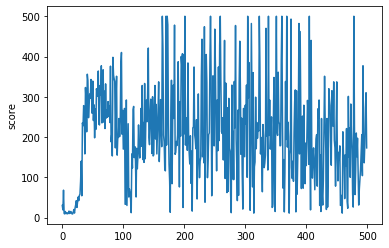

In [35]:
env = gym.make('CartPole-v1')
agent = DQNAgent()
score_history = []
for e in range(1, EPISODES+1):
    state = env.reset()
    steps = 0
    while True:
        env.render()
        state = torch.FloatTensor([state])
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action.item())
        
        if done:
            reward = -1
        
        agent.memorize(state, action, reward, next_state)
        agent.learn()
        
        state = next_state
        steps += 1
        
        if done:
            print("EPISODE:{0} Score: {1}".format(e, steps))
            score_history.append(steps)
            break

plt.plot(score_history)
plt.ylabel('score')
plt.show()

In [36]:
env.close()

In [ ]:
env = gym.make('CartPole-v1')
agent.model.eval()
score_history = []
for e in range(1, EPISODES+1):
    state = env.reset()
    steps = 0
    while True:
        env.render()
        state = torch.FloatTensor([state])
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action.item())
        
        if done:
            reward = -1
        
        agent.memorize(state, action, reward, next_state)
        agent.learn()
        
        state = next_state
        steps += 1
        
        if done:
            print("EPISODE:{0} Score: {1}".format(e, steps))
            score_history.append(steps)
            break

plt.plot(score_history)
plt.ylabel('score')
plt.show()